### Independent Component Analysis
----
#### 1.任意の遺伝子を2つ直交座標系で表現するグラフを作る
#### 2.任意の関数をプロットする
#### 3.ICAの結果について線形回帰

In [1]:
# Import Library

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./sample_vs_gene_MG.csv"
    , "genes": ["HK1", "HK2"]
    , "size": (4, 4)
    , "x": np.linspace(0, 10, 1000)
    , "values": (1, 0)
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": .7}
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0)

In [4]:
# Shape Data
data = np.log2(rawdata+1).sort_index()
data.index.name=None

In [5]:
# Select genes as the 2 axes
df = data.loc[:, CONFIG["genes"]]

cor=df.corr()
cor

,HK1,HK2
HK1,1.000000,-0.151234
HK2,-0.151234,1.000000


In [6]:
# Defining the cueve
x = CONFIG['x']
y = CONFIG['values'][0] * x + CONFIG['values'][1]

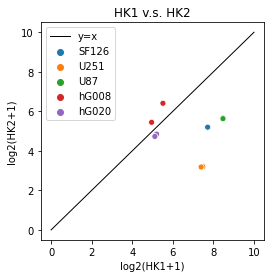

In [7]:
# Plot
plt.figure(figsize=CONFIG["size"])
plt.plot(x, y, label='y=x', color='k', linewidth=1, linestyle='solid')
sns.scatterplot(x=CONFIG["genes"][0], y=CONFIG["genes"][1], data=df, hue=df.index)
plt.xlabel(f"log2({CONFIG['genes'][0]}+1)")
plt.ylabel(f"log2({CONFIG['genes'][1]}+1)")
plt.title(f"{CONFIG['genes'][0]} v.s. {CONFIG['genes'][1]}")
plt.savefig(f"./{CONFIG['genes'][0]}_vs_{CONFIG['genes'][1]}.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

<Figure size 288x288 with 0 Axes>

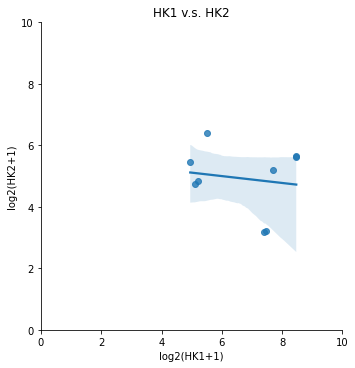

In [8]:
# Linear regression

# このデータセットでは全く意味ない

plt.figure(figsize=CONFIG["size"])
sns.lmplot(x=CONFIG["genes"][0], y=CONFIG["genes"][1], data=df, fit_reg=True, truncate=True, legend=True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(f"log2({CONFIG['genes'][0]}+1)")
plt.ylabel(f"log2({CONFIG['genes'][1]}+1)")
plt.title(f"{CONFIG['genes'][0]} v.s. {CONFIG['genes'][1]}")
plt.savefig(f"./{CONFIG['genes'][0]}_vs_{CONFIG['genes'][1]}_reg.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [13]:
#Load Data
df2 = pd.read_csv("PCAed_data.csv", index_col=0).iloc[:, 0:2]

cord = df2.corr()

cord

,PCA1,PCA2
PCA1,1.000000e+00,3.435625e-17
PCA2,3.435625e-17,1.000000e+00
